/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/

⚠️ 폰트 설정 실패: 한글이 깨질 수 있습니다. 오류: [Errno 2] No such file or directory: '/content/C:/Windows/Fonts/malgun.ttf'


/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 52880 (\N{HANGUL SYLLABLE KAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 54140 (\N{HANGUL SYLLABLE PEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1568822226.py:78: UserWarning: Glyph 47553 (\N{HANGUL SYLLABLE RING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/t

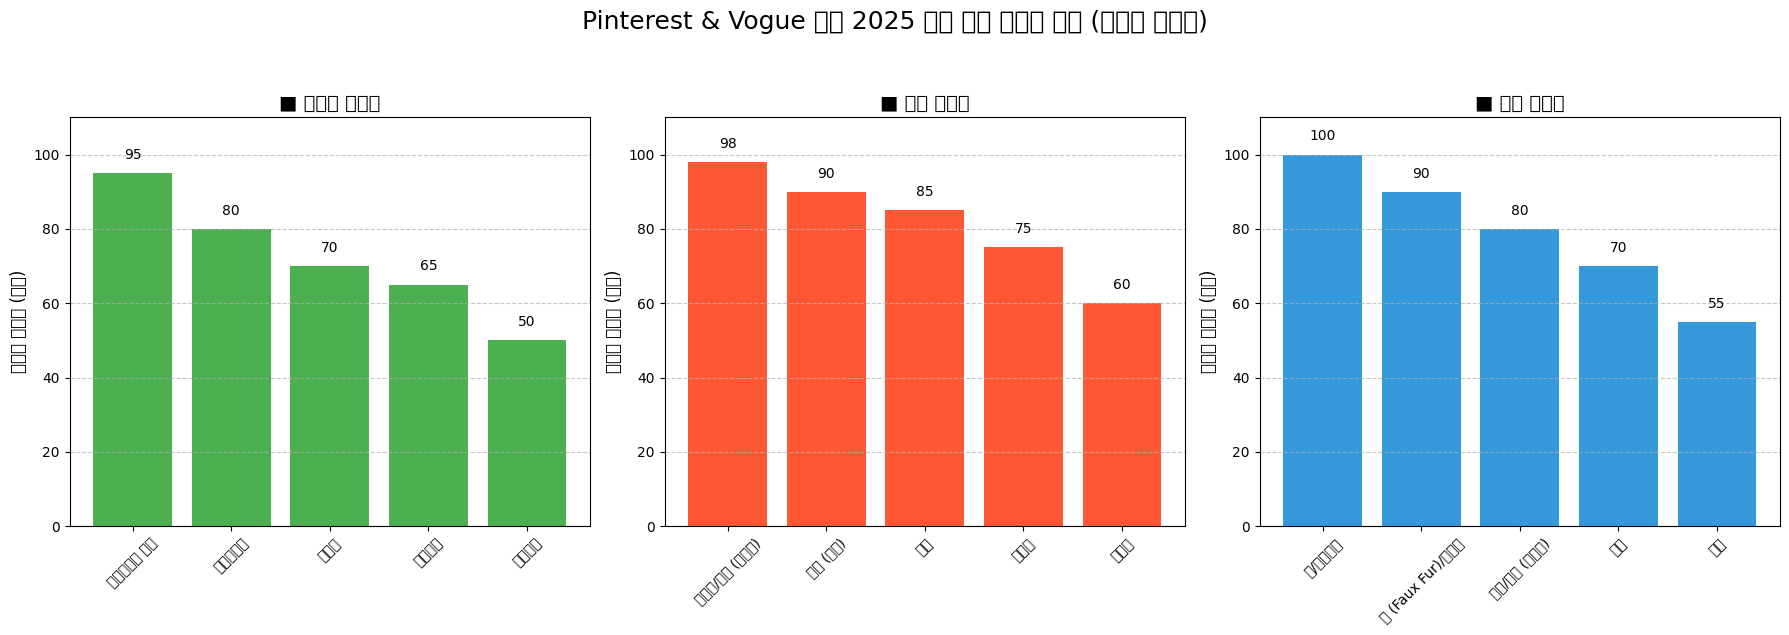

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

try:
    # 맑은 고딕 폰트 경로 (Windows 기준. 환경에 따라 경로 수정 필요)
    # Colab/Jupyter에서 한글 깨짐 발생 시, 시스템에 맞는 폰트 경로로 수정하거나,
    # Colab의 경우 아래 코드 대신 '!sudo apt-get install -y fonts-nanum; !sudo fc-cache -fv; !rm ~/.matplotlib/fontlist-v*.json' 실행 후 런타임 재시작 필요
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
    print("✅ 한글 폰트 설정 완료 (Windows '맑은 고딕' 기준)")
except Exception as e:
    print(f"⚠️ 폰트 설정 실패: 한글이 깨질 수 있습니다. 오류: {e}")
    # 대체 폰트 설정
    plt.rc('font', family='Malgun Gothic') # 다른 환경에 맞춰 수정하세요


# 📌 분석 결과를 반영한 가상의 트렌드 중요도 데이터
data = {
    '아이템 트렌드': {
        '오버사이즈 코트': 95,
        '바라클라바': 80,
        '롱부츠': 70,
        '조거팬츠': 65,
        '블레이저': 50
    },
    '컬러 트렌드': {
        '오트밀/크림 (뉴트럴)': 98,
        '블랙 (기본)': 90,
        '카멜': 85,
        '딥그린': 75,
        '버건디': 60
    },
    '소재 트렌드': {
        '울/캐시미어': 100,
        '퍼 (Faux Fur)/시어링': 90,
        '다운/웰론 (기능성)': 80,
        '가죽': 70,
        '벨벳': 55
    }
}

# ----------------------------------------------------------------------
# 2. 그래프 생성 함수 정의 (이전에 누락된 부분)
# ----------------------------------------------------------------------

def plot_trend_analysis(data):
    """
    트렌드 분석 결과를 시각화하는 함수
    """

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Pinterest & Vogue 기반 2025 겨울 패션 트렌드 분석 (상대적 중요도)', fontsize=18, y=1.05)

    colors = ['#4CAF50', '#FF5733', '#3498DB']  # 그래프 색상

    for i, (title, scores) in enumerate(data.items()):
        # 데이터프레임으로 변환 및 중요도 순으로 정렬
        df = pd.DataFrame(list(scores.items()), columns=['키워드', '중요도'])
        df = df.sort_values(by='중요도', ascending=False)

        ax = axes[i]
        bars = ax.bar(df['키워드'], df['중요도'], color=colors[i])

        ax.set_title(f"■ {title}", fontsize=14)
        ax.set_ylabel('상대적 중요도 (점수)', fontsize=12)
        ax.tick_params(axis='x', rotation=45) # x축 라벨 45도 회전
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_ylim(0, 110) # y축 범위 고정

        # 막대 위에 중요도 점수 표시
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval + 3, round(yval),
                    ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# ----------------------------------------------------
# 3. 그래프 실행
# ----------------------------------------------------
plot_trend_analysis(data)

#

![image.png](attachment:8f179364-08bc-4db9-8412-a3e8d61a8016.png)

![image.png](attachment:5a88f92a-ddab-4e9c-9f57-9f4b3b114abe.png)

### 요약하자면, 2024년이 '정돈되고 절제된 우아함'에 집중했다면, 2025년 겨울은 '과감한 실루엣과 볼륨, 그리고 실용적인 방한 기능'을 패션으로 끌어들이는 방향으로 트렌드가 진화했다고 볼 수 있다.

- 2024년과 2025년 겨울 패션 트렌드의 흐름과 변화 양상을 종합하여 2026년 패션 트렌드를 몇 가지 방향으로 예측해 볼 수 있음
핵심 예측: 2024년의 정돈된 미니멀리즘에서 2025년의 과감한 볼륨으로 넘어온 흐름을 볼 때, 2026년에는 이 두 극단이 융합되거나 혹은 실용성에 기반을 둔 새로운 맥시멀리즘으로 발전할 가능성이 높습니다.

## 2026년 겨울 패션 트렌드 예측
1. 아이템 & 실루엣 예측: '정제된 볼륨'과 '기능성 지속'
정제된 볼륨 (Refined Volume): 2025년의 극단적인 오버사이즈와 볼륨이 다소 정돈될 것입니다. 옷의 부피는 크되, 테일러링과 소재의 질감을 통해 불필요한 무게감 없이 구조적인 형태를 강조하는 코트나 재킷이 부상할 수 있습니다. (2024년의 미니멀 테일러링 + 2025년의 볼륨 결합)
고급 유틸리티웨어 (Luxury Utility): 바라클라바, 롱부츠 등 2025년의 기능성 아이템 인기는 지속될 것입니다. 다만, 저가형 기능성 소재가 아닌, 울, 캐시미어, 고급 가죽 등 럭셔리 소재를 접목한 프리미엄 기능성 아이템이 주류를 이룰 것입니다.
- 하이브리드 바텀: 2024년의 포멀한 와이드 슬랙스와 2025년의 캐주얼 조거팬츠의 장점을 합친, 포멀한 핏과 소재의 믹스를 통해 편안함과 격식을 모두 잡은 바텀 아이템이 인기를 얻을 수 있습니다.

2. 컬러 & 소재 예측: '차가운 뉴트럴'과 '질감 강조'
차가운 뉴트럴 (Cool Neutrals): 오트밀/카멜 계열의 따뜻한 뉴트럴 톤이 주를 이루던 흐름에서 벗어나, 차가운 그레이, 실버, 스틸 블루 같은 무채색 기반의 쿨 뉴트럴 컬러가 세련된 룩을 주도할 것입니다. 이는 정제된 볼륨 실루엣과도 잘 어울립니다.

- 질감 중심 소재: 소재 자체의 촉감과 질감이 강조될 것입니다. 특히, 2025년에 강세였던 퍼(Faux Fur)와 시어링의 인기는 유지되되, 극도의 부드러움을 자랑하는 고밀도 캐시미어나 수공예적인 니트웨어가 더욱 주목받을 것입니다.

- 메탈릭 액센트: 2025년 딥그린/버건디 같은 짙은 액센트 컬러 대신, 골드, 실버 등의 메탈릭 컬러가 액세서리나 의류의 작은 부분에 포인트로 사용되어 미래지향적이고 시크한 느낌을 더할 수 있습니다.

3. 스타일링 예측: '개인 맞춤형 맥시멀리즘'
믹스 앤 매치 (Mix & Match): 2024년의 미니멀한 공식과 2025년의 맥시멀한 볼륨을 섞어, 클래식 아이템(테일러드 코트) 위에 기능성 아이템(고급 바라클라바)을 매치하는 개인 맞춤형 스타일링이 중요해질 것입니다.

- 하나의 임팩트 (One Statement Piece): 옷 전체를 과장하기보다, 하나의 대담한 아이템 (예: 구조적인 숄더를 가진 코트, 강렬한 색상의 롱부츠)에만 집중하여 룩 전체의 포인트를 주는 스타일이 유행할 수 있습니다.